In [29]:
import collections
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import preprocessing
print 'Pandas Version ' + pd.__version__

Pandas Version 0.20.2


In [ ]:
NUM_SAMPLES = 5000

In [30]:
# Setup the scaler to standardize the data
min_max_scaler = preprocessing.MinMaxScaler()

In [31]:
# Make the data and write it to a file
X1, Y1 = make_blobs(n_features=2, centers=3, n_samples=NUM_SAMPLES)

# Standardize the input data
X1 = min_max_scaler.fit_transform(X1)

# Write the input data and labels (one hot) to a CSV file
f= open("./data/data.csv","w+")
for i in range(5000):
    for x  in range(2):
        f.write("%f," % X1[i,x])
    f.write("%d," % Y1[i])
    if (Y1[i] == 0):
        f.write("1.0,0.0,0.0\r\n")
    elif (Y1[i] == 1):
        f.write("0.0,1.0,0.0\r\n")
    elif(Y1[i] == 2):
        f.write("0.0,0.0,1.0\r\n")
f.close()

In [32]:
# Read the raw CSV file into a dataframe
df = pd.read_csv('data/data.csv', names=["X1","X2","Z1","Y1","Y2","Y3"], encoding='utf-8')
# Look at the top of the dataframe
df.head(10)

,X1,X2,Z1,Y1,Y2,Y3
0,0.644542,0.367008,0,1.0,0.0,0.0
1,0.194555,0.546738,2,0.0,0.0,1.0
2,0.093405,0.273556,2,0.0,0.0,1.0
3,0.623279,0.365511,0,1.0,0.0,0.0
4,0.772695,0.726839,1,0.0,1.0,0.0
5,0.864151,0.690225,1,0.0,1.0,0.0
6,0.827286,0.727939,1,0.0,1.0,0.0
7,0.824905,0.598496,1,0.0,1.0,0.0
8,0.714527,0.825915,1,0.0,1.0,0.0
9,0.686727,0.344766,0,1.0,0.0,0.0


In [33]:
df.describe()

,X1,X2,Z1,Y1,Y2,Y3
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.530092,0.450767,0.999800,0.333400,0.333400,0.333200
std,0.270077,0.197238,0.816537,0.471475,0.471475,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230167,0.297227,0.000000,0.000000,0.000000,0.000000
50%,0.576681,0.406178,1.000000,0.000000,0.000000,0.000000
75%,0.783660,0.626525,2.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000


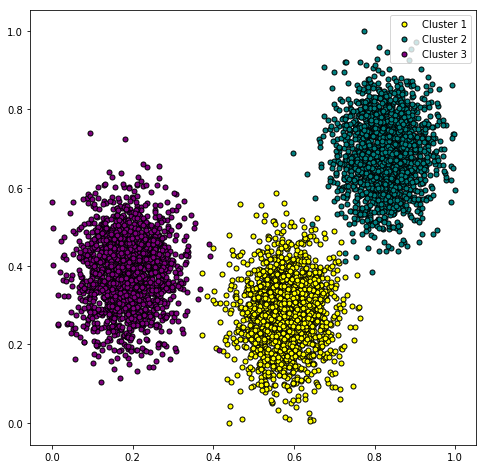

In [34]:
# Plot the entire data set before splitting into training and evaluation
fig, ax = plt.subplots(figsize=(8, 8))
df_cluster1 = df[df.Z1 == 0]
df_cluster2 = df[df.Z1 == 1]
df_cluster3 = df[df.Z1 == 2]
ax.scatter(df_cluster1["X1"], df_cluster1["X2"], marker='o', c="yellow",
            s=25, edgecolor='k', label="Cluster 1")
ax.scatter(df_cluster2["X1"], df_cluster2["X2"], marker='o', c="teal",
            s=25, edgecolor='k', label="Cluster 2")
ax.scatter(df_cluster3["X1"], df_cluster3["X2"], marker='o', c="purple",
            s=25, edgecolor='k', label="Cluster 3")

ax.legend(loc='upper right')

In [35]:
# Split the data into a training (80%) and evaluation file (20%)
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)

In [36]:
train.head()

,X1,X2,Z1,Y1,Y2,Y3
3019,0.630070,0.246669,0,1.0,0.0,0.0
2198,0.794530,0.737165,1,0.0,1.0,0.0
432,0.861939,0.615702,1,0.0,1.0,0.0
2789,0.856198,0.795665,1,0.0,1.0,0.0
305,0.304222,0.430611,2,0.0,0.0,1.0


In [37]:
test.head()

,X1,X2,Z1,Y1,Y2,Y3
2,0.093405,0.273556,2,0.0,0.0,1.0
17,0.545071,0.267128,0,1.0,0.0,0.0
18,0.671709,0.174887,0,1.0,0.0,0.0
37,0.717697,0.534594,1,0.0,1.0,0.0
39,0.642997,0.208609,0,1.0,0.0,0.0


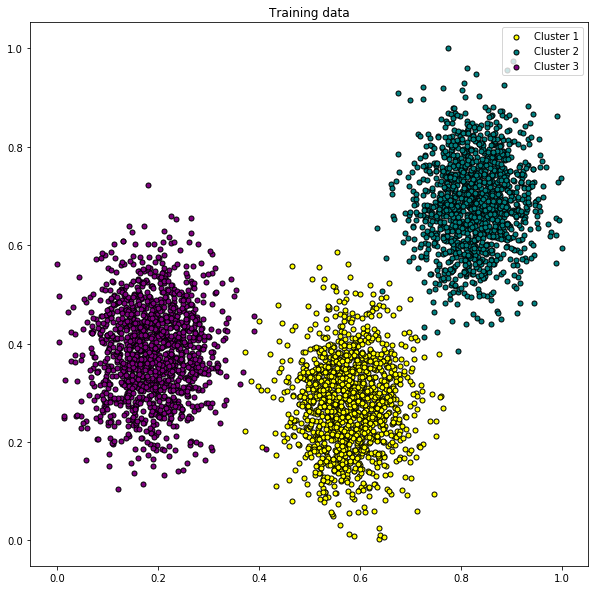

In [46]:
# Plot the training data to see what it looks like
fig, ax = plt.subplots(figsize=(10, 10))
df_cluster1 = train[train.Z1 == 0]
df_cluster2 = train[train.Z1 == 1]
df_cluster3 = train[train.Z1 == 2]
ax.scatter(df_cluster1["X1"], df_cluster1["X2"], marker='o', c="yellow",
            s=25, edgecolor='k', label="Cluster 1")
ax.scatter(df_cluster2["X1"], df_cluster2["X2"], marker='o', c="teal",
            s=25, edgecolor='k', label="Cluster 2")
ax.scatter(df_cluster3["X1"], df_cluster3["X2"], marker='o', c="purple",
            s=25, edgecolor='k', label="Cluster 3")

ax.legend(loc='upper right')
plt.title("Training data")
plt.savefig('training_data.eps', bbox_inches='tight')
plt.show()


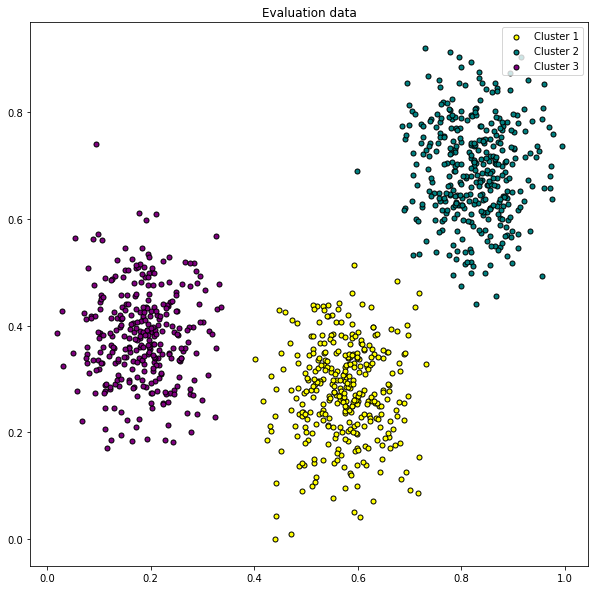

In [47]:
# Plot the evaluation data to see what it looks like
fig, ax = plt.subplots(figsize=(10, 10))
df_cluster1 = test[test.Z1 == 0]
df_cluster2 = test[test.Z1 == 1]
df_cluster3 = test[test.Z1 == 2]
ax.scatter(df_cluster1["X1"], df_cluster1["X2"], marker='o', c="yellow",
            s=25, edgecolor='k', label="Cluster 1")
ax.scatter(df_cluster2["X1"], df_cluster2["X2"], marker='o', c="teal",
            s=25, edgecolor='k', label="Cluster 2")
ax.scatter(df_cluster3["X1"], df_cluster3["X2"], marker='o', c="purple",
            s=25, edgecolor='k', label="Cluster 3")

ax.legend(loc='upper right')
plt.title("Evaluation data")
plt.savefig('eval_data.eps', bbox_inches='tight')
plt.show()


In [40]:
# Quick peek at the training data
train.head()

,X1,X2,Z1,Y1,Y2,Y3
3019,0.630070,0.246669,0,1.0,0.0,0.0
2198,0.794530,0.737165,1,0.0,1.0,0.0
432,0.861939,0.615702,1,0.0,1.0,0.0
2789,0.856198,0.795665,1,0.0,1.0,0.0
305,0.304222,0.430611,2,0.0,0.0,1.0


In [41]:
# Quick peek at the evaluation data
test.head()

,X1,X2,Z1,Y1,Y2,Y3
2,0.093405,0.273556,2,0.0,0.0,1.0
17,0.545071,0.267128,0,1.0,0.0,0.0
18,0.671709,0.174887,0,1.0,0.0,0.0
37,0.717697,0.534594,1,0.0,1.0,0.0
39,0.642997,0.208609,0,1.0,0.0,0.0


In [42]:
# Save the training data
train.to_csv("./data/train.csv",index=None,header=None,columns=["X1","X2","Y1","Y2","Y3"])

In [43]:
# Save the evaluation data
test.to_csv("./data/eval.csv",index=None,header=None,columns=["X1","X2","Y1","Y2","Y3"])